# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Problem Statement

To identify and classify images as cats or dogs

## Learning Objectives

At the end of the experiment, you will be able to :

* Load and prepare images for the model using Pytorch
* Develop a CNN model and improve model performance

In [ ]:
#@title Mini-hackathon walkthrough
from IPython.display import HTML

HTML("""<video width="500" height="300" controls>
  <source src="https://cdn.talentsprint.com/aiml/aiml_2020_b14_hyd/experiment_details_backup/Pytorch_CNN_cats_and_dogs.mp4" type="video/mp4">
</video>
""")

## Dataset

The Dogs and Cats dataset is a standard computer vision dataset that involves classifying photos as either containing a dog or cat. The train folder contains 22,500 images of dogs and cats. Each image in this folder has the label as part of the filename. The test folder contains 2,500 images, named according to a numeric id. 

## Grading = 20 Marks

## Setup Steps

In [1]:
#@title Run this cell to download the dataset

from IPython import get_ipython
ipython = get_ipython()
  
notebook="M2_Mini_Hackathon2_CNN_with_Pytorch" #name of the notebook
Answer = "This notebook is graded by mentors on the day of hackathon"
def setup():
# 
   ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/Cat_Dog_data.zip")
   ipython.magic("sx unzip -qq Cat_Dog_data.zip")
# ipython.magic("sx mv AIML_DS_GOOGLENEWS-VECTORS-NEGATIVE-300_STD.bin?dl=1 AIML_DS_GOOGLENEWS-VECTORS-NEGATIVE-300_STD.bin")
   print ("Setup completed successfully")
   return

setup()

^C
Setup completed successfully


## Basic Pytorch packages

**torchvision:**  This package is used to load and prepare the dataset. Using this package we can perform/apply transformations on the input data.

**transforms:**  This package is  used to perform preprocessing on images and operations sequentially. 

**nn:**  This package provides an easy and modular way to build and train simple or complex neural networks.

**optim:** This package is used for  implementing various optimization algorithms

In [2]:
# Import Libraries
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms, models
from torch import nn
import torch.nn.functional as F
from torch import optim
from torch.autograd import Variable

KeyboardInterrupt: ignored

In [ ]:
### To test whether GPU instance is present in the system of not.
use_cuda = torch.cuda.is_available()
print('Using PyTorch version:', torch.__version__, 'CUDA:', use_cuda)
device = torch.device("cuda" if use_cuda else "cpu")
device

## **Stage 1:** Define Transformations and import data

### 2 Marks - > Compose multiple transformations with the following conditions

1. Transform image size to 128 by using Resize()

2. Convert image to Grayscale

3. Transform the image into a number using tensor

4. Normalize the tensor image with 0.5

[Hint](https://pytorch.org/docs/stable/torchvision/transforms.html)

In [ ]:
image_size = (128,128)

train_transformations =  transforms.Compose([
        transforms.Resize(image_size),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Normalize((0.5,),(0.5,))
    ])

test_transformations =  transforms.Compose([
        transforms.Resize(image_size),
        transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Normalize((0.5,),(0.5,))
    ])

### 1 Mark -> Load the dataset with the defined transformations
 
PyTorch includes a package called torchvision which is used to load and prepare the dataset. It includes two basic functions namely Dataset and DataLoader which helps in the transformation and loading of the dataset.

1. Dataset is used to read and transform a data point from the given dataset.  Note that, the data is not loaded on memory by now.

2. DataLoader is used to shuffle and batch the data. It can be used to load the data in parallel with multiprocessing workers. The Data loader reads the data and puts it into memory.



[Hint](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html)

In [ ]:
batch_size = 128

train_dataset = datasets.ImageFolder('/content/Cat_Dog_data/train', transform = train_transformations)

train_size = 20000
val_size = len(train_dataset) - train_size

train_set, val_set = torch.utils.data.random_split(train_dataset,[train_size,val_size])

# YOUR CODE HERE for the DataLoader
# train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
train_loader = torch.utils.data.DataLoader(train_set,batch_size=batch_size,shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set,batch_size=batch_size,shuffle=False)

### 2 Marks -> Plot the 5 images of Cats and 5 images of Dogs

In [ ]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    y_train = y_train.float().unsqueeze(1)
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([128, 1, 128, 128]) type: torch.FloatTensor
y_train: torch.Size([128, 1]) type: torch.FloatTensor


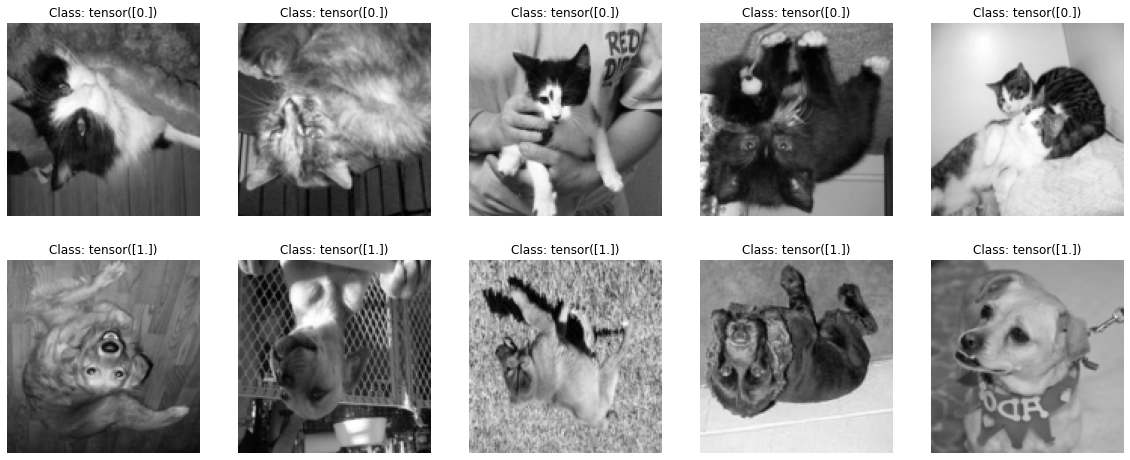

In [ ]:
# YOUR CODE HERE for plotting the images
pltsize=2
plt.figure(figsize=(10*pltsize, pltsize*4))
c,d = 0, 0

for i in range(100):
  if y_train[i] == 0:
    c += 1
    if c < 6:
      plt.subplot(2,5,c)
      plt.axis('off')
      plt.imshow(X_train[i,:,:,:].numpy().reshape(128,128), cmap="gray")
      plt.title('Class: '+str(y_train[i]))

  if y_train[i] == 1:
    d += 1
    if d < 6:
      plt.subplot(2,5,d+5)
      plt.axis('off')
      plt.imshow(X_train[i,:,:,:].numpy().reshape(128,128), cmap="gray")
      plt.title('Class: '+str(y_train[i]))

## **Stage2:** CNN Model

Neural Networks are inherited from the nn.Module class.

Define a neural network by using two functions \__init__ and forward function.

1. In the \__init__  function, perform a series of convolutions and pooling operations to detect the features. Apply a fully connected layer on top of these features. Apply LogSoftmax at the output layer to improve the performance.

2. The forward function is called on the Neural Network which takes the inputs and passes through the different layers that have been defined in the \__init__.  The output of both convolution and pooling layers is 3D whereas a fully connected layer expects a 1D vector of numbers. So flatten the output of the final pooling layer to a vector and that becomes the input to the fully connected layer.

[Hint](https://medium.com/ml2vec/intro-to-pytorch-with-image-classification-on-a-fashion-clothes-dataset-e589682df0c5)



### 5 Marks -> Create CNN Model


In [ ]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution Layer 1 
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2), # output size of the first convolutional layer is 16*128*128
            nn.BatchNorm2d(16),
            nn.ReLU(),
            # Maxpool for the Convolutional Layer 1
            nn.MaxPool2d(kernel_size=4, stride=4), # Maxpooling reduces the size by kernel size. After Maxpooling the output size is 16*32*32
        )
        #output size of first layer is 16x32x32

        nn.

        # Convolution Layer 2
        self.layer2 = nn.Sequential(
            # output size of the second convolutional layer is 32*32*32
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2), 
            nn.BatchNorm2d(32),
            nn.ReLU(),
            # Maxpool for the Convolutional Layer 2
            nn.MaxPool2d(kernel_size=4, stride=4), 
        )
        #output size of second layer is 32x8x8
        
        # Convolution Layer 3
        self.layer3 = nn.Sequential(
            # output size of the third convolutional layer is 64*8*8
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2), 
            nn.BatchNorm2d(64),
            nn.ReLU(),
            # Maxpool for the Convolutional Layer 3
            nn.MaxPool2d(kernel_size=4, stride=4), 
            # nn.Dropout2d(0.2)
        )
        #output size of third layer is 64x2x2
        
     
        # YOUR CODE HERE for defining the Fully Connected Layer and also define LogSoftmax
        self.fc1 = nn.Linear(64*2*2, 32)
        #Dropout
        self.fc1_drop = nn.Dropout(0.2)
        self.fc2 = nn.Linear(32,2)


    
    def forward(self, x):
        # YOUR CODE HERE for the Convolutional Layers and Maxpool based on the defined Convolutional layers
        out1 = self.layer1(x)
        out2 = self.layer2(out1)
        out3 = self.layer3(out2)

        # YOUR CODE HERE for flattening the output of the final pooling layer to a vector. Flattening is simply arranging the 3D volume of numbers into a 1D vector
        out3 = out3.view(out3.size(0), -1)
        out4 = self.fc1(out3)
        out4 = self.fc1_drop(out4)
        out5 = self.fc2(out4)

        # YOUR CODE HERE for returning the output of LogSoftmax after applying Fully Connected Layer
        return F.log_softmax(out5, dim=1)

### 1 Mark -> Declaring the loss function and optimizer


In [ ]:
model = CNNModel()
model = model.to(device)
print(model)

#criterion = # YOUR CODE HERE : Explore and declare loss function
criterion = nn.NLLLoss()

#optimizer = # YOUR CODE HERE : Explore on the optimizer and define with the learning rate
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)

CNNModel(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=256, out_features=32, bias=True)
  (fc1_drop): Dropout(p=0.2, inplace=False)
  (fc2): L

## **Stage 3:** Train the Model and validate it continuously to calculate the loss and accuracy for the dataset across each epoch.

### Expected training accuracy is above 90%

### 5 Marks -> Iterate over images in the train_loader and perform the following steps. 

1. First, we zero out the gradients using zero_grad()

2. We pass the data to the model 

3. We calculate the loss using a Loss function

4. Perform Backward pass using backward() to update the weights

5. Optimize and predict by using the torch.max()

6. Calculate the accuracy of the train dataset

[Hint](https://medium.com/ml2vec/intro-to-pytorch-with-image-classification-on-a-fashion-clothes-dataset-e589682df0c5)

In [ ]:
def train(epoch,loss_vector,acc_vector):
  model.train()
  correct, train_loss = 0,0
  for batch_id, (images, labels) in enumerate(train_loader):

      images, labels = images.to(device), labels.to(device)
      
      #1. First, we zero out the gradients using zero_grad()
      optimizer.zero_grad()

      #2. We pass the data to the model
      outputs = model(images)

      _, predicted = torch.max(outputs.data, 1)
      correct += (predicted == labels).sum()

      #3. We calculate the loss using a Loss function
      loss = criterion(outputs, labels)
      train_loss += loss.item()

      #4. Perform Backward pass using backward() to update the weights
      loss.backward()

      #5. Optimize and predict by using the torch.max()
      optimizer.step()
      
      # if batch_id % 100 == 0:
      #     print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
      #         epoch, batch_id * len(images), len(train_loader.dataset),
      #         100. * batch_id / len(train_loader), loss.item()))
  train_loss /= len(train_loader)
  loss_vector.append(train_loss)

  accuracy = 100. * correct/ len(train_loader.dataset)
  acc_vector.append(accuracy)
  # print(f'Train accuracy: {accuracy}; Loss: {train_loss}')

In [ ]:
def test(loss_vector, accuracy_vector):
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
      for data, target in val_loader:
          data, target = data.to(device), target.to(device)
          output = model(data)
          test_loss += criterion(output, target).item()
          pred = torch.max(output.data,1)[1] # get the index of the max log-probability
          correct += pred.eq(target.data).to(device).sum()

    test_loss /= len(val_loader)
    loss_vector.append(test_loss)

    accuracy = 100. * correct / len(val_loader.dataset)
    accuracy_vector.append(accuracy)
    
    # print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    #     test_loss, correct, len(test_loader.dataset), accuracy))

In [ ]:
%%time
epochs = 50

losst, acct = [], []
lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch, losst, acct)
    test(lossv, accv)
    print('{}: Train set: Acc: {:.2f}% Loss: {:.4f}; Test set: Acc: {:.2f}% Loss: {:.4f}'.format(epoch, acct[-1], losst[-1], accv[-1], lossv[-1]))

1: Train set: Acc: 67.70% Loss: 0.6012; Test set: Acc: 71.56% Loss: 0.5473
2: Train set: Acc: 75.06% Loss: 0.5135; Test set: Acc: 76.64% Loss: 0.4968
3: Train set: Acc: 78.46% Loss: 0.4593; Test set: Acc: 79.84% Loss: 0.4357
4: Train set: Acc: 80.25% Loss: 0.4291; Test set: Acc: 70.44% Loss: 0.6036
5: Train set: Acc: 82.15% Loss: 0.4033; Test set: Acc: 77.80% Loss: 0.5066
6: Train set: Acc: 83.19% Loss: 0.3779; Test set: Acc: 75.80% Loss: 0.5316
7: Train set: Acc: 84.05% Loss: 0.3646; Test set: Acc: 77.64% Loss: 0.5073
8: Train set: Acc: 85.04% Loss: 0.3432; Test set: Acc: 85.28% Loss: 0.3441
9: Train set: Acc: 85.85% Loss: 0.3268; Test set: Acc: 84.04% Loss: 0.3461
10: Train set: Acc: 86.54% Loss: 0.3126; Test set: Acc: 78.56% Loss: 0.4746
11: Train set: Acc: 86.93% Loss: 0.3050; Test set: Acc: 76.56% Loss: 0.5373
12: Train set: Acc: 87.38% Loss: 0.2950; Test set: Acc: 84.80% Loss: 0.3465
13: Train set: Acc: 88.32% Loss: 0.2722; Test set: Acc: 70.56% Loss: 0.7404
14: Train set: Acc: 8

In [ ]:
x = range(1,epochs+1)
plt.plot(x,losst,label='train')
plt.plot(x,lossv,label='test')
plt.legend()
plt.show()

plt.plot(x,acct,label='train')
plt.plot(x,accv,label='test')
plt.legend()
plt.show()

## **Stage 4:** Testing Evaluation for CNN model

### Expected performance of test evaluation is above 90%

### 4 Marks -> Evaluate model with the given test data

1. Transform and load the test images.

2. Pass the test data through the model (network) to get the outputs

3. Get the predictions from a maximum value using torch.max

4. Compare with the actual labels and get the count

5. Calculate the accuracy 

[Hint](https://medium.com/ml2vec/intro-to-pytorch-with-image-classification-on-a-fashion-clothes-dataset-e589682df0c5)

In [ ]:
test_set = datasets.ImageFolder('/content/Cat_Dog_data/test',transform = test_transformations)

# YOUR CODE HERE for the DataLoader
test_loader = torch.utils.data.DataLoader(test_set,batch_size=batch_size,shuffle=False)

In [ ]:
# YOUR CODE HERE for calculating the accuracy
model.eval()
test_loss, correct = 0, 0
with torch.no_grad():
  for data, target in test_loader:
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += criterion(output, target).item()
      pred = torch.max(output.data,1)[1] # get the index of the max log-probability
      correct += pred.eq(target.data).to(device).sum()

test_loss /= len(test_loader)
# loss_vector.append(test_loss)

accuracy = 100. * correct / len(test_loader.dataset)
# accuracy_vector.append(accuracy)

print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset), accuracy))

Test set: Average loss: 0.4094, Accuracy: 2184/2500 (87.36%)

